In [7]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# Part a
###### $x_0 = 0$
###### $y_0 = 0$
###### ${dx \over dt} = v_x$
###### ${dy \over dt} = v_y$
###### $dv_x = 0$
###### $dv_y = -mg$

In [69]:
x0 = 0
y0 = 0
t0 = 0
tf = 3.5 #seconds
v0 = 300 #m/s
g = 9.8 #gravity #m/s
d = 7.8 #g/cm^3 #density
D = 15 #diameter_cm
G = 0.25 #Gamma #N.s^2/m^4
l = 10000 #lambda #m
A = 50 #angle_in_degrees
a = A*np.pi/180 #angle_rads
r = D/2
p = 1000
T = np.linspace(t0,tf,p)


V = (4/3)*np.pi*(r**3)
m = d*V*1/p

vx0 = v0*np.cos(a)
vy0 = v0*np.sin(a)

IV = [x0,y0,vx0,vy0]

def proj_vac(t,IC):
    x,y,vx,vy = IC
    dx = vx
    dy = vy
    dvx = 0.0
    dvy = -m*g
    return np.array([dx,dy,dvx,dvy])


In [70]:
sol = integrate.solve_ivp(proj_vac,(t0,tf),IV,t_eval=T, method='RK45')
solx = sol.y[0]
soly = sol.y[1]

Horizontal Range is 674.9269901708677


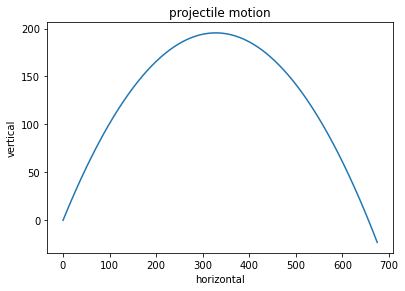

In [71]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_title('projectile motion')
ax.set_xlabel('horizontal')
ax.set_ylabel('vertical')
ax.plot(solx,soly);

hr = solx[-1]
print('Horizontal Range is',hr)

# Part b
##### Runge-Kutta

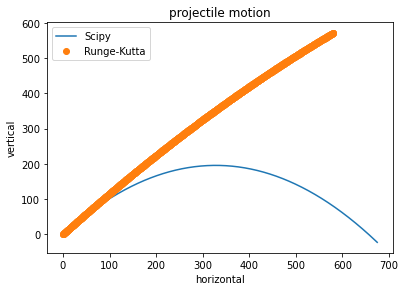

In [79]:
def runge_kutta(func,t,x0, args=()):
    n = len(t)
    x = np.zeros((n,len(x0)))
    x[0] = x0
    for i in range(0,n-1):
        dt = t[i+1]-t[i]
        k1 = func(t[i],x[i], *args)
        k2 = func(t[i] + dt/2.0, x[1] + (dt/2.0) *k1, *args)
        k3 = func(t[i] + dt/2.0, x[1] + (dt/2.0)*k2, *args )
        k4 = func(t[i] + dt, x[1] + dt*k3, *args)
        x[i+1] = x[i] + dt/6*(k1 + (2*k2) + (2*k3) + (k4/6))
    return x

rksol = runge_kutta(proj_vac,T,IV)
rksolx = rksol[:,0]
rksoly = rksol[:,1]
rk_fig = plt.figure()
rk_ax = rk_fig.add_axes([0.1,0.1,0.8,0.8])
rk_ax.set_title('projectile motion')
rk_ax.set_xlabel('horizontal')
rk_ax.set_ylabel('vertical')
rk_ax.plot(solx,soly,label='Scipy');
rk_ax.plot(rksolx,rksoly,'o',label='Runge-Kutta');
rk_ax.legend();

    

# Part c
##### air pressure
###### ${dx \over dt} = v_x$
###### ${dy \over dt} = v_y$
###### ${dv_x \over dt} = f_{dragx}$
###### ${dv_y \over dt} = -mg - f_{dragy}$

In [ ]:
fdragc =
fdrag =


def prof_vac(t,IC):
    x,y,vx,vy = IC
    dx = vx
    dy = vy
    dvx = fdragc
    dvy = -m*g - fdrag